# **Segmentation Analysis**:<a class="anchor" id="0"></a>

1. [**Data Import**](#1)
2. [**Segmentation**](#2)

In [1]:
import numpy as np
import pandas as pd

from _util.custom_plotting import *
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from _util.custom_mem_opt import custom_mem_opt

sns.set_style('darkgrid')
color = sns.color_palette()

pd.options.mode.chained_assignment = None  # default='warn'

root = './_data/'

### Data Import <a class=anchor id="1"></a>
[Back to top](#0)

In [2]:
aisles = custom_mem_opt(pd.read_csv(root + 'aisles.csv'), verbose=False)
departments = custom_mem_opt(pd.read_csv(root + 'departments.csv'), verbose=False)
orders = custom_mem_opt(pd.read_csv(root + 'orders.csv'), verbose=False)
order_products_prior = custom_mem_opt(pd.read_csv(root + 'order_products__prior.csv'), verbose=False)
order_products_train = custom_mem_opt(pd.read_csv(root + 'order_products__train.csv'), verbose=False)
products = custom_mem_opt(pd.read_csv(root + 'products.csv'), verbose=False)

In [3]:
# Focus on customers in prior set.
order_products = order_products_prior.merge(products, on ='product_id', how='left')
order_products = order_products.merge(aisles, on ='aisle_id', how='left')
order_products = order_products.merge(departments, on ='department_id', how='left')
order_products = order_products.merge(orders, on='order_id', how='left')
print(order_products.shape)

(32434489, 15)


In [4]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [5]:
print(order_products.user_id.nunique())

206209


### Segmentation <a class=anchor id="2"></a>
[Back to top](#0)

Going to use PCA on aisles to mitigate dimensionality of the data.

In [6]:
ct = pd.crosstab(order_products.user_id, order_products.aisle)
ct.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [7]:
# Normalize
df = ct.div(ct.sum(axis=1), axis=0)
df.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.016949,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.016949
2,0.0,0.015385,0.0,0.0,0.0,0.0,0.010256,0.0,0.0,0.0,...,0.015385,0.005128,0.005128,0.000000,0.0,0.0,0.0,0.010256,0.0,0.215385
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.045455,0.011364,0.000000,0.000000,0.0,0.0,0.0,0.022727,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.055556,0.0,0.0,0.0,0.055556,0.0,0.000000
5,0.0,0.054054,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.081081


In [8]:
print(df.shape)

(206209, 134)


#### PCA and K-Means Clustering

Reducing dimensionality to facilitate k-means.

In [9]:
pca = PCA(n_components=10)
pca_df = pca.fit_transform(df)
pca_df = pd.DataFrame(pca_df)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.113443,0.039084,-0.042863,0.018866,-0.088340,-0.104545,-0.116449,0.083729,-0.062510,-0.026008
1,-0.036988,0.108884,-0.066406,-0.123270,0.098846,-0.033953,-0.054742,-0.053341,-0.020406,-0.007972
2,0.064282,0.103962,0.000710,-0.012221,-0.046985,0.112228,-0.029826,0.007813,0.012105,0.001652
3,-0.093210,0.054093,0.001867,-0.003974,-0.071358,-0.019268,-0.025108,-0.038205,0.006574,-0.000441
4,0.094629,-0.037051,-0.024952,-0.021575,0.055370,0.107648,-0.008040,0.103904,0.051745,-0.025850


In [10]:
ssd = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pca_df)
    ssd.append(km.inertia_)

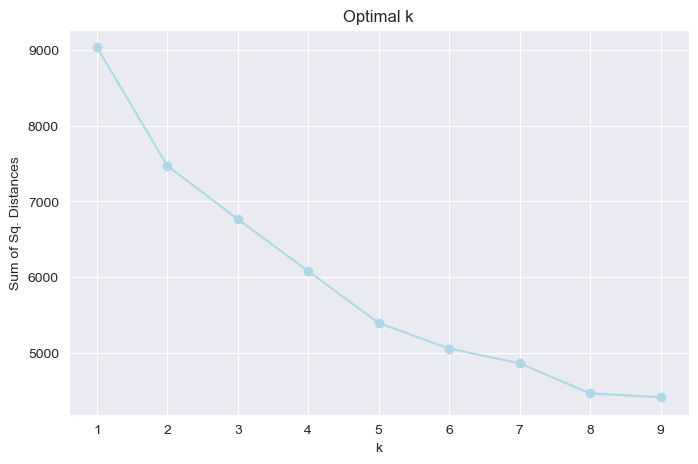

In [11]:
plt.subplots(figsize = (8, 5))
plt.plot(K, ssd, marker='o', color='lightblue')
plt.xlabel('k')
plt.ylabel('Sum of Sq. Distances')
plt.title('Optimal k')
plt.savefig('_plts/elbow.png')
plt.show()

We'll go with k=5 from the plot.

In [12]:
clusterer = KMeans(n_clusters=5,random_state=42).fit(pca_df)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(pca_df)
print(centers)

[[ 1.03563419e-01 -7.21139818e-02  1.68057760e-02  5.22874788e-03
  -9.62736963e-04 -3.34459598e-03 -1.83974649e-04  1.12030479e-03
  -4.49188439e-04  6.88392523e-04]
 [-8.75838361e-02 -1.17317987e-02 -2.55911371e-03  3.52867636e-03
  -2.25629838e-02  3.51706201e-03  3.48156517e-03 -2.10290707e-03
  -3.04405679e-04 -7.15928516e-04]
 [-3.28667674e-02  1.47628174e-02 -4.24931418e-02 -7.43835539e-02
   8.38645201e-02 -1.08093997e-02 -1.61547087e-02  1.84320206e-03
   5.38111883e-04  1.35121720e-04]
 [-9.65563619e-03  1.28391286e-01  9.21486192e-03  2.30926784e-01
   1.11480576e-01 -2.25000014e-02  8.18068345e-04 -6.55424857e-03
   8.02525452e-03  2.95957567e-03]
 [ 7.41112836e-02  1.13203962e-01  4.69395367e-03 -2.25281613e-02
  -2.40382365e-02  9.41928178e-03  2.16110414e-03  3.83582018e-03
  -7.32949801e-04 -1.27740073e-04]]


In [13]:
temp_df = pca_df.iloc[:, 0:2]
temp_df.columns = ["pc1", "pc2"]
temp_df['cluster'] = c_preds
temp_df.head()

,pc1,pc2,cluster
0,-0.113443,0.039084,1
1,-0.036988,0.108884,2
2,0.064282,0.103962,4
3,-0.093210,0.054093,1
4,0.094629,-0.037051,0


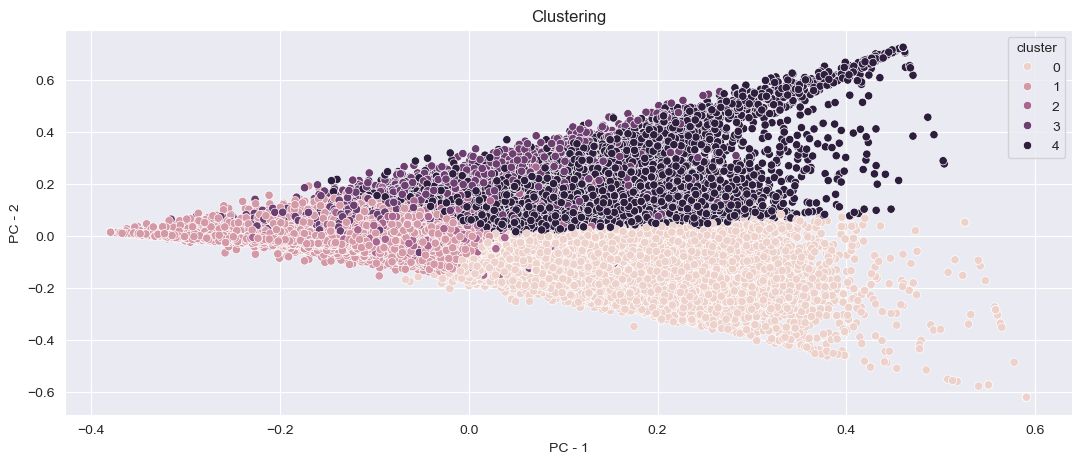

In [14]:
fig, ax = plt.subplots(figsize = (13, 5))
ax = sns.scatterplot(data = temp_df, x = "pc1", y = "pc2", hue = "cluster")
ax.set_xlabel("PC - 1")
ax.set_ylabel("PC - 2")
ax.set_title("Clustering")
plt.savefig('_plts/clustering.png')
plt.show()

### Top Products x Cluster

In [16]:
ct['cluster'] = c_preds

cluster1 = ct[ct.cluster == 0]
cluster2 = ct[ct.cluster == 1]
cluster3 = ct[ct.cluster == 2]
cluster4 = ct[ct.cluster == 3]
cluster5 = ct[ct.cluster == 4]

In [17]:
print(cluster1.shape)

(55356, 135)


In [18]:
print(cluster1.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10])

aisle
fresh vegetables                 37.093125
fresh fruits                     21.650806
packaged vegetables fruits       11.982658
yogurt                            6.114694
packaged cheese                   4.991094
fresh herbs                       4.158754
milk                              3.975233
soy lactosefree                   3.695047
frozen produce                    3.293482
water seltzer sparkling water     3.071284
dtype: float64


In [19]:
print(cluster2.shape)

(5369, 135)


In [20]:
print(cluster2.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10])

aisle
water seltzer sparkling water    20.914882
fresh fruits                      3.303967
soft drinks                       2.810207
yogurt                            2.230210
energy granola bars               1.543863
tea                               1.320916
chips pretzels                    1.319054
milk                              1.314397
packaged vegetables fruits        1.219408
soy lactosefree                   1.070218
dtype: float64


In [21]:
print(cluster3.shape)

(38887, 135)


In [22]:
print(cluster3.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10])

aisle
fresh fruits                     35.669941
fresh vegetables                 15.213722
packaged vegetables fruits       12.195618
yogurt                           10.024430
milk                              6.006840
packaged cheese                   5.193432
soy lactosefree                   3.802710
water seltzer sparkling water     3.638620
bread                             3.231697
chips pretzels                    3.163499
dtype: float64


In [23]:
print(cluster4.shape)

(98639, 135)


In [24]:
print(cluster4.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10])

aisle
fresh fruits                     9.652085
fresh vegetables                 7.536877
yogurt                           7.160565
packaged vegetables fruits       5.955930
packaged cheese                  4.914141
chips pretzels                   4.477205
milk                             4.232251
water seltzer sparkling water    4.096666
refrigerated                     3.250591
ice cream ice                    3.097010
dtype: float64


In [25]:
print(cluster5.shape)

(7958, 135)


In [26]:
print(cluster5.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10])

aisle
packaged produce                 18.349083
fresh fruits                     10.904499
packaged vegetables fruits        4.236743
fresh vegetables                  3.100402
water seltzer sparkling water     1.714124
milk                              1.614979
packaged cheese                   1.542850
frozen produce                    1.146896
chips pretzels                    1.140111
nuts seeds dried fruit            1.032546
dtype: float64


- Cluster 1 includes 55356 consumers who exhibit preferences for fresh vegetables followed by fruits.
- Cluster 2 includes 5369 consumers who exhibit preferences for water seltzer sparkling water aisle.
- Cluster 3 includes 38887 consumers who exhibit preferences for fruits followed and fresh vegetables.
- Cluster 4 includes 98639 consumers who don't exhibit clear preferences for any category. Their average orders are relatively low, so either they don't use Instacart regularly or they are new. 
- Cluster 5 includes 7958 consumers  who exhibit preferences for packaged produce and fresh fruits.

